# Érdekességek a matematika alkalmazásaiból

## Mesterséges intelligencia és gépi tanulás - bevezető

*Gyarmathy Zsófia & Varasdi Károly*

### Jupyter notebook és Python környezet felállítás, csomagimportok

In [5]:
## Képmegjelenítéshez a notebookban:
from IPython.core.display import Image, display #használat: display(Image(filename='image.png'))

### Áttekintés: Mesterséges intelligencia és gépi tanulás

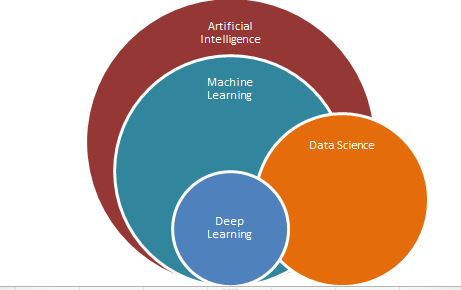

Forrás: AI Trends


In [32]:
display(Image('abrak/venn-ai-ml-dl-ds.png'))
print("Forrás: AI Trends")

* **Mesterséges intelligencia  / Artificial Intelligence (AI)**: Olyan algoritmusok összessége, amelyek a magasabb emberi kognitív funkciókhoz hasonló képességekkel ruházzák fel a számítógépet.

    * **Gépi tanulás / Machine Learning (ML)**: olyan algoritmusok összessége, amelyek alkalmassá teszik a gépet az adatokból való önálló tanulásra és teljesítményének javítására.
    *Tanulóadatok* alapján egy olyan modellt épít, amely a még nem látott adatokra vonatkozóan is helyes előrejelzéseket tesz.
    
        * **(Mesterséges) neurális hálózatok / (Artificial) neural networks (ANN)**: a biológiai agy működése által inspirált gépi tanuló rendszerek, melyekben nagy számú, egymással összefüggésben álló feldolgozó elemek (neuronok) együttes működésével és az egymás közötti kapcsolatok módosításával lehetséges egy-egy konkrét feladat megoldása.

            * **Mélytanuló rendszer / Deep learning (DL)**: Olyan neurális hálózat, amelyben a neuronok több rétegre oszlanak: egy bemeneti, egy kimeneti és közöttük legalább egy ún. *rejtett rétegre*.

*A következők közül melyikre célszerű gépi tanulást alkalmazni?*

1. Egy másodperc alatt több millió számítási feladatot elvégezni.
2. Nagy felbontású háromdimenziós játékgrafikát kirajzolni.
3. Bejövő emailekből kiszűrni a kéretleneket.
4. Inaktivitás esetén kikapcsolni a képernyőt.
5. Egyszerre több szkriptet futtatni.
6. Kézírást átalakítani számítógépes szöveggé.
7. Meghatározni, hogy milyen típusú dolgok és események láthatók egy képen.
8. Egy Excel-tábla minden oszlopára kiszámolni az oszlopbeli számok miniumát, átlagát és maximumát.
9. Felismerni az illetéktelen bankkártyahasználatot.
10. Egy webáruház látogatóit csoportokba sorolni az alapján, hogy milyen áruk iránt érdeklődnek.
11. Megjósolni egy szerver várható terheltségét.

### A gépi tanulási modell

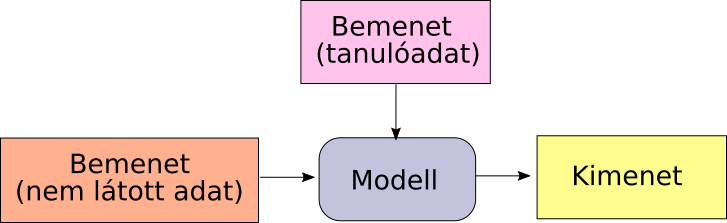

In [16]:
display(Image('abrak/IOmodell.png', width=400))

* Pl. bemenet egy kártyatranzakció, kimenet: illetéktelen-e. 
* Kérdés: Fontos-e az ábrán a nyilak *időbeli sorrendje*, és ha igen, mi az?
* Kérdés: Mi(k) a különbség(ek) az ábrán a felső, *tanítóadat bemenet és a nem látott adat bemenete* között?
* Kérdés: *Mi a gépi tanulási modell tényleges bemenete?* A tranzakció szövege?

#### A modell mint függvény:

* `kimenet = f(bemenet)`
* `kimeneti változó = f(bemeneti változók vektora)`
* `függő változó = f(független változók)`

**(Betanított) modell vs. algoritmus:**

> `modell = algoritmus(tanítóadat)`

#### Nem emberi intelligencia és tanulás!

* Gépi tanulásban (szinte) mindent számokra (beleértve az Igen/Nem bool értékeket) kell visszavezetni.
    * (Van néhány kivétel, pl. döntési fák.)
* Nem emberi tanulás.

Egy pixeles támadás (forrás: https://arxiv.org/pdf/1710.08864.pdf):

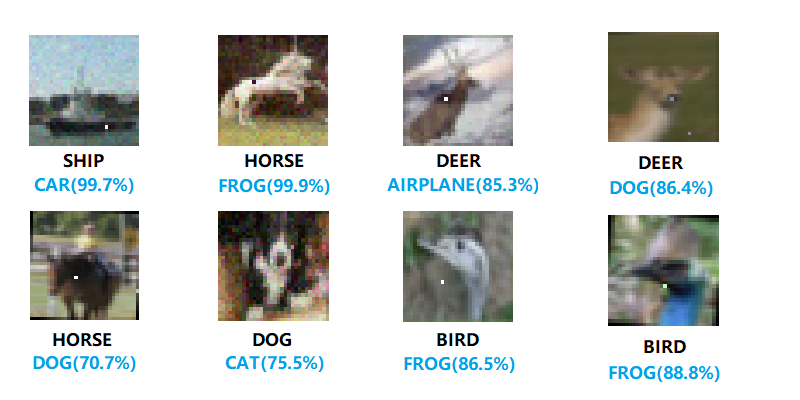

In [6]:
display(Image('abrak/one_pixel_fooled.png'))

Husky kutya farkasként klasszifikálva a hó mint "feature" miatt
(forrás: https://arxiv.org/abs/1602.04938):

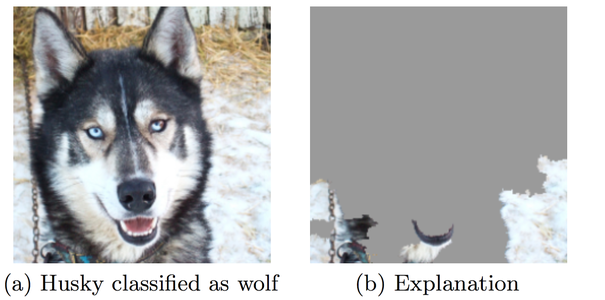

In [15]:
display(Image('abrak/husky-farkas.png', width=400))

### Változótípusok

A kártyatranzakcióban szerepelnek a következő adatok:
* vevő neve, pl. "Nagy István"
* eladó neve, pl. "Kis-Nagy Ember Bt"
* ár, pl. "30000 Ft"
* szállítási cím, pl. "1025 Budapest, Nagyonbudai út 12, 1. em. 2. ajtó".

1. Például a szállítási adattal tudunk egy-az-egyben kezdeni valamit? Vagy érdemes kiabsztrahálni belőle változókat? (Persze, hogy igen.)

2. Miben különbözik a vevő neve és az ár?

3. Miben különbözik a házszám és az ár?

4. Miben különbözik az irányítószám és az ár?

##### Nominális / kategorikus

* Például városnév: Budapest, Tatabánya, Mezőtúr....
* Az egyes értékekre definiált az **egyenlőség**, semmi más.
    * `Budapest = Budapest`, `Budapest != Tatabánya`
* (Például a városnév hossza mint szám nem számít.)

##### Ordinális

* Például iskolai végzettség: általános iskola < gimnázium < egyetem < doktori
* Az egyes értékekre az egyenlőség mellett definiált a **kisebb-nagyobb reláció**.
    * `gimnázium < egyetem`
* De az egyes értékek közti *távolság* nincs értelmezve.
    * `egyetem - általános iskola` ?? = ?? `doktori - gimnázium`

##### Intervallum

* Például hőmérséklet a Celsius-skálán
* Az egyes értékekre az egyenlőség és a kisebb-nagyobb reláció mellett definiált a **távolság**.
    * `35 fok - 15 fok = 20 fok - 0 fok`
* De az egyes értékek közti *arány* nincs értelmezve:
    * `20 fok != 2 * 10 fok`
    > "Ha ma nulla fok van és holnap kétszer olyan hideg várható, hány fok lesz holnap?"

##### Arányskála (ratio scale)

* Például távolság két pont között egy síkon.
* Az egyes értékekre az egyenlőség, a kisebb-nagyobb reláció és a távolság mellett az **arány** is definiálva van (illetve az összes, valós számokon értelmezett művelet).
    * `20 km = 2 * 10 km` 

#### Gyakorlat: milyen típusú változó?

* Biológiai nem
* Egy árucikk ára
* Életkor
* Hajszín
* Havi nettó jövedelem
* Milyen betűkből áll egy szó
* Hány betűből áll egy szó
* Irányítószám
* Helyezés egy versenyen
* Likert-skála: ("Hogy érzi magát?" -- "Rosszul", "Okésan", "Jól", "Nagyon jól")

#### Hogyan mérhetünk "átlagot"?

* **Számtani közép (arithmetic mean):** $\mu = \frac{1}{n}\Sigma_{i=0}^n x_i$
* **Medián (median):** $\{\frac{n + 1}{2}\}$-dik elem értéke növekvő sorrendbe rendezve az n számú adatot.
    * Ha páratlan számú adat, akkor a középen álló elem értéke.
    * Ha páros számú adat, akkor a középső két érték számtani közepe a medián.
* **Módusz (mode):** A leggyakrabban előforduló érték.

A fenti példáknál (változótípusoknál) melyik alkalmazható?

Egy szemléletes áttekintés (forrás: https://www.mymarketresearchmethods.com/wp-content/uploads/2016/05/summary-of-data-types-and-scales-768x405.png):

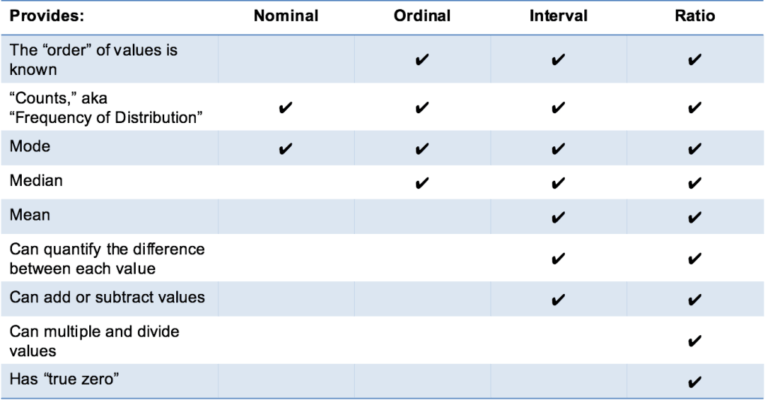

In [28]:
imgurl = "https://www.mymarketresearchmethods.com/wp-content/uploads/2016/05/summary-of-data-types-and-scales-768x405.png"
display(Image(imgurl,width=600))

#### Hogyan lesz numerikus bemeneti/kimeneti változó egy nominális változó?

1. Számként kódolás: Kis csalás, de a kategóriákat szokták direktben **számként kódolni**.
    1. férfi = 1, nő = 2
    2. spam = 1, nem spam = 0
    3. betűk -> számok
    
    > Ordinális és/vagy bináris kategóriáknál ez elegendő is lehet. Végezhetünk korrelációmérést, regressziót stb.
    
2. Sokszor kell/érdemes második lépésként: n-hosszúságú Boole-vektorként kódolni n kategóriát:
    Példa: férfi / nő -> 2-elemű vektor, első indexe a férfi kategória, a második a nő.
    
    2a. **binary encoding**: minden személyre vektorban i indexnél 1, ha van adott indexnek megfelelő nemű testvére, 0, ha nem. (Minden helyen 0 vagy 1 szerepel.)
    
    2b. **one-hot encoding**: minden személyre: vektorban i indexnél 1, ha az illető az indexnek megfelelő nemű, és 0, ha nem. (Pontosan egy helyen van 1, többi helyen 0.)

Egy jó példa (forrás: <https://medium.com/datadriveninvestor/data-preprocessing-for-machine-learning-188e9eef1d2c>):

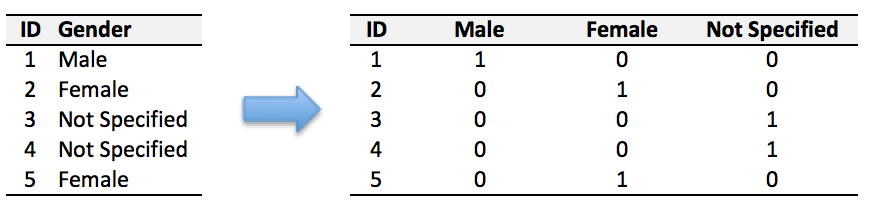

In [30]:
display(Image('abrak/onehotpelda.png', width=600))